##### 顯示 OpenCV 圖片和影片
這篇教學會介紹如何運用 PyQt5 的 QLabel 搭配 QPixmap，在 PyQt5 中顯示 OpenCV 函式庫所開啟的圖片或透過 OpenCV 讀取電腦攝影機鏡頭顯示影片。

安裝 OpenCV 函式庫 
輸入下列指令安裝 OpenCV，根據個人環境使用 pip 或 pip3 。
* pip install opencv-python

##### 顯示 OpenCV 圖片 
使用 OpenCV 的 imread 方法讀取圖片後，先將圖片轉換成 RGB 色彩模式 ( OpenCV 預設為 RBG )，\
接著透過 PyQt5 的 QImage 方法將圖片轉換成 PyQt5 使用的圖片格式，再使用 QPixmap 讀取圖片，就能在視窗中顯示 OpenCV 的圖片。

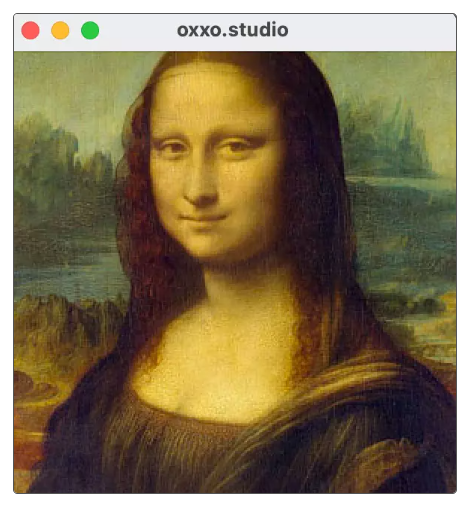

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
import sys, cv2

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(1200, 1200)

label = QtWidgets.QLabel(MainWindow)     # 建立 QLabel
label.setGeometry(0,0,1000,1000)           # 設定 QLabel 大小位置

img = cv2.imread(r'Data\image\Patrick Star1.jpg')                 # 開啟圖片，預設使用 cv2.IMREAD_COLOR 模式
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # 轉換顏色為 RGB
height, width, channel = img.shape           # 取得圖片長寬尺寸和色彩頻道數量
bytesPerline = channel * width               # 計算 bytesPerline
qimg = QImage(img, width, height, bytesPerline, QImage.Format_RGB888) # 轉換成 PyQt5 使用的圖片格式
canvas = QPixmap(800,800).fromImage(qimg)    # 建立 QPixmap 畫布，讀取圖片
label.setPixmap(canvas)                      # 放入畫布

MainWindow.show()
sys.exit(app.exec_())

也可以改用 class 的寫法：

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
import sys, cv2

class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')
        self.resize(300, 300)
        self.setUpdatesEnabled(True)
        self.ui()

    def ui(self):
        self.label = QtWidgets.QLabel(self)
        self.setGeometry(0,0,300,300)
        img = cv2.imread('mona.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        height, width, channel = img.shape
        bytesPerline = channel * width
        qimg = QImage(img, width, height, bytesPerline, QImage.Format_RGB888)
        canvas = QPixmap(300,300).fromImage(qimg)
        self.label.setPixmap(canvas)

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    sys.exit(app.exec_())

##### 顯示 OpenCV 影片 
因為 PyQt5 的視窗本身是「無窮迴圈」，OpenCV 讀取電腦攝影機影像也是「無窮迴圈」，如果要讓兩個無窮迴圈同時動作，\
需要使用 threading 將 OpenCV 讀取影像的功能，放在另外的執行緒執行，並搭配一個全域變數控制關閉的事件，\
當 PyQt5 視窗關閉時，同時也將 OpenCV 的迴圈停止，避免仍然在背景運作的狀況。

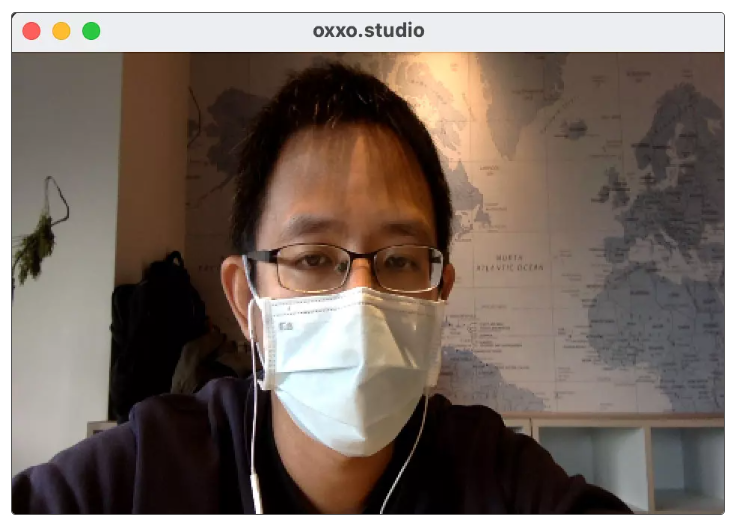

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
import sys, cv2, threading

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(300, 200)

label = QtWidgets.QLabel(MainWindow)    # 建立 QLabel
label.setGeometry(0,0,300,200)          # 設定 QLabel 位置尺寸

ocv = True             # 設定全域變數，讓關閉視窗時 OpenCV 也會跟著關閉
def closeOpenCV():
    global ocv
    ocv = False        # 關閉視窗時，將 ocv 設為 False

MainWindow.closeEvent = closeOpenCV  # 設定關閉視窗的動作

# 讀取攝影機的函式
def opencv():
    global ocv
    cap = cv2.VideoCapture(0)         # 設定攝影機鏡頭
    if not cap.isOpened():
        print("Cannot open camera")
        exit()
    while ocv:
        ret, frame = cap.read()       # 讀取攝影機畫面
        if not ret:
            print("Cannot receive frame")
            break
        frame = cv2.resize(frame, (300, 200))   # 改變尺寸和視窗相同
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # 轉換成 RGB
        height, width, channel = frame.shape    # 讀取尺寸和 channel數量
        bytesPerline = channel * width          # 設定 bytesPerline ( 轉換使用 )
        # 轉換影像為 QImage，讓 PyQt5 可以讀取
        img = QImage(frame, width, height, bytesPerline, QImage.Format_RGB888)
        label.setPixmap(QPixmap.fromImage(img)) # QLabel 顯示影像

video = threading.Thread(target=opencv)         # 建立 OpenCV 的 Thread
video.start()                                   # 啟動 Thread

MainWindow.show()
sys.exit(app.exec_())

也可以改用 class 的寫法：

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
import sys, cv2, threading

class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')
        self.resize(480, 320)
        self.setUpdatesEnabled(True)
        self.ui()
        self.ocv = True

    def ui(self):
        self.label = QtWidgets.QLabel(self)
        self.label.setGeometry(0, 0, 480, 320)

    def closeEvent(self):
        self.ocv = False

    def opencv(self):
        cap = cv2.VideoCapture(0)
        if not cap.isOpened():
            print("Cannot open camera")
            exit()
        while self.ocv:
            ret, frame = cap.read()
            if not ret:
                print("Cannot receive frame")
                break
            frame = cv2.resize(frame, (480, 320))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            height, width, channel = frame.shape
            bytesPerline = channel * width
            qimg = QImage(frame, width, height, bytesPerline, QImage.Format_RGB888)
            self.label.setPixmap(QPixmap.fromImage(qimg))


if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    video = threading.Thread(target=Form.opencv)
    video.start()
    Form.show()
    sys.exit(app.exec_())